In [1]:
import numpy as np
import glob
from matplotlib import pyplot as plt
from getdist import plots, MCSamples#https://github.com/cmbant/getdist/

In [2]:
FileList = sorted(glob.glob("out_*.dat"))#all files starting with out_*
print(FileList)

['out_cat1_MCMC_0.dat', 'out_cat1_MCMC_1.dat', 'out_cat1_MCMC_2.dat', 'out_cat1_MCMC_3.dat', 'out_cat1_MCMC_4.dat', 'out_cat2_MCMC_0.dat', 'out_cat2_MCMC_1.dat', 'out_cat2_MCMC_2.dat', 'out_cat2_MCMC_3.dat', 'out_cat2_MCMC_4.dat', 'out_cat3_MCMC_0.dat', 'out_cat3_MCMC_1.dat', 'out_cat4_MCMC_0.dat', 'out_cat4_MCMC_1.dat', 'out_cat4_MCMC_2.dat', 'out_cat4_MCMC_3.dat', 'out_cat4_MCMC_4.dat', 'out_cat5_MCMC_0.dat', 'out_cat5_MCMC_1.dat', 'out_cat5_MCMC_2.dat', 'out_cat5_MCMC_3.dat', 'out_cat5_MCMC_4.dat', 'out_nekoya_MCMC_0.dat', 'out_nekoya_MCMC_1.dat', 'out_nekoya_MCMC_2.dat', 'out_nekoya_MCMC_3.dat', 'out_nekoya_MCMC_4.dat']


In [3]:
header = ["istep", "iaccept", "p_accept","LL","rh","rhos","rs","alp","bet","gam","rb","net","bet0","betinf","vsys"]
MyData = np.genfromtxt(FileList[0],dtype=float,skip_footer=1)
print(MyData)

[[ 0.00000000e+00  1.00000000e+00  1.00000000e+00 ...  0.00000000e+00
   0.00000000e+00 -2.86894318e+02]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  0.00000000e+00
   0.00000000e+00 -2.89278564e+02]
 [ 2.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00 -2.92002655e+02]
 ...
 [ 4.99996000e+05  1.00000000e+00  6.86618000e-01 ...  0.00000000e+00
   0.00000000e+00 -2.89892181e+02]
 [ 4.99997000e+05  0.00000000e+00  5.63610000e-02 ...  0.00000000e+00
   0.00000000e+00 -2.89254608e+02]
 [ 4.99998000e+05  0.00000000e+00  2.53334000e-01 ...  0.00000000e+00
   0.00000000e+00 -2.90400696e+02]]


In [4]:
DataList = []
#put all into one list, so that they do not have do be loaded again for each parameter
for fileNow in FileList:
    print(fileNow)
    DataList.append(np.genfromtxt(fileNow,dtype=float,skip_footer=1))
Nfiles = len(FileList)

out_cat1_MCMC_0.dat
out_cat1_MCMC_1.dat
out_cat1_MCMC_2.dat
out_cat1_MCMC_3.dat
out_cat1_MCMC_4.dat
out_cat2_MCMC_0.dat
out_cat2_MCMC_1.dat
out_cat2_MCMC_2.dat
out_cat2_MCMC_3.dat
out_cat2_MCMC_4.dat
out_cat3_MCMC_0.dat
out_cat3_MCMC_1.dat
out_cat4_MCMC_0.dat
out_cat4_MCMC_1.dat
out_cat4_MCMC_2.dat
out_cat4_MCMC_3.dat
out_cat4_MCMC_4.dat
out_cat5_MCMC_0.dat
out_cat5_MCMC_1.dat
out_cat5_MCMC_2.dat
out_cat5_MCMC_3.dat
out_cat5_MCMC_4.dat
out_nekoya_MCMC_0.dat
out_nekoya_MCMC_1.dat
out_nekoya_MCMC_2.dat
out_nekoya_MCMC_3.dat
out_nekoya_MCMC_4.dat


In [5]:
Nburn = 1000
if False:#not because we start at optimum
    #remove burn-in

    #burn_fraction = 0.3
    Nkeep = Nburn#int(Ntot*burn_fraction)
    print(np.shape(MyData))
    MyData = MyData[Nkeep:,:]
    print(np.shape(MyData))

In [6]:
i_acc = MyData[:,1]
idx_acc = (i_acc == 1.0)

0.32892865785731573


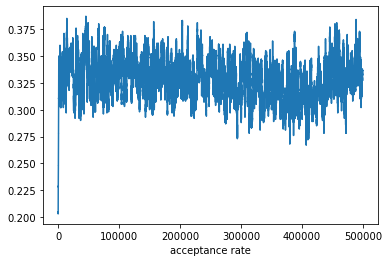

In [7]:
#acceptance ratio
print(np.sum(i_acc)/float(len(i_acc)))
Ntot = len(i_acc)
Nsmooth = 1000
Nacc = np.zeros(Ntot-Nsmooth)
for i in range(Ntot-Nsmooth):
    Nacc[i]=(np.sum(i_acc[i:i+Nsmooth])/Nsmooth)
plt.plot(Nacc)
plt.xlabel('acceptance rate')
plt.show()

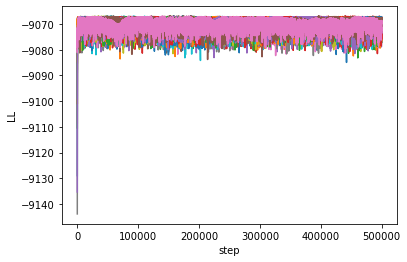

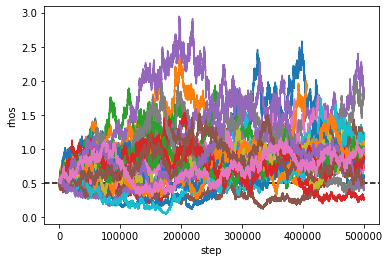

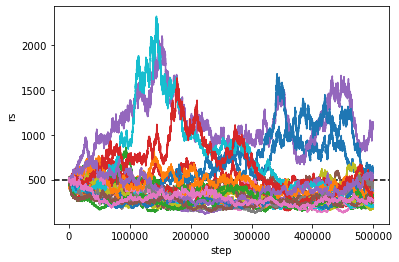

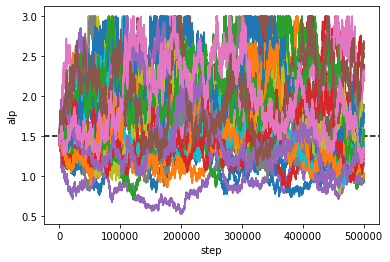

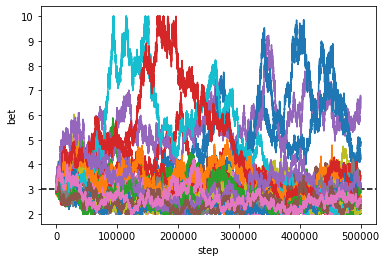

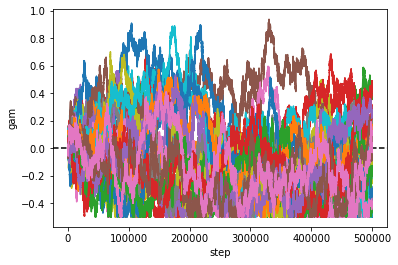

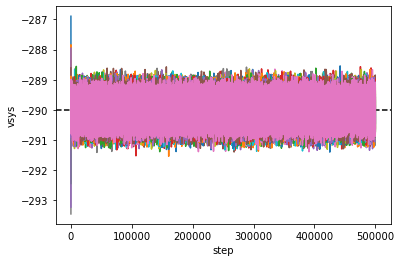

<Figure size 432x288 with 0 Axes>

In [8]:
plt.clf()
GroundTruth = [0,0.5,0.5,-400240,214,0.5,500,1.5,3.0,0.0,1e3,5,0,0,-290]
for i in [3,5,6,7,8,9,14]:
    if(i != 3):
        plt.axhline(y=GroundTruth[i],ls="--",c='k')
    for j,fileNow in enumerate(FileList):
        MyData = DataList[j]
        if False:
            #remove burn-in
            MyData = MyData[Nburn:,:]
        i_acc = MyData[:,1]
        idx_acc = (i_acc == 1.0)
#        print(np.sum(i_acc)/float(len(i_acc)))
        plt.plot(MyData[idx_acc,0],MyData[idx_acc,i],label=fileNow)
        #plt.scatter(mu,sigma,marker="^",s=8)
    plt.xlabel('step')
    plt.ylabel(header[i])
    plt.savefig('MyMCMC_'+str(i)+'.png')
#    plt.legend()
#    plt.xlim([0,500])
    plt.show()
    plt.clf()

In [9]:
def DMdens(radius,rhos,rs,alp,bet,gam):
    return rhos * ((radius/rs)**(-1.0*gam)) * ((1.+(radius/rs)**alp)**(-1.0*(bet-gam)/alp))

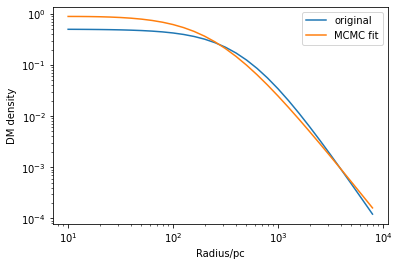

<Figure size 432x288 with 0 Axes>

In [10]:
rad = np.arange(1,4,0.1)
rad = 10**rad
plt.clf()
plt.plot(rad,DMdens(rad,0.5,500,1.5,3.0,0.0),label='original')
plt.plot(rad,DMdens(rad,MyData[-1,5],MyData[-1,6],MyData[-1,7],MyData[-1,8],MyData[-1,9]),label='MCMC fit')#last
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radius/pc')
plt.ylabel('DM density')
plt.legend()
plt.show()
plt.clf()

In [11]:
#write all data in one array
DataFull = np.genfromtxt(FileList[0],dtype=float,skip_footer=1)
DataFull = DataFull[DataFull[:,1]==1,:]#use only accepted
DataFull = DataFull[Nburn:,:]
print(FileList)
if(len(FileList)>1):
    for FileNow in FileList[1:]:
        print(FileNow)
        DataNow = np.genfromtxt(FileNow,dtype=float,skip_footer=1)
        DataNow = DataNow[DataNow[:,1]==1,:]
        DataFull = np.append(DataFull,DataNow[Nburn:,:],axis=0)
print(np.shape(DataFull))

['out_cat1_MCMC_0.dat', 'out_cat1_MCMC_1.dat', 'out_cat1_MCMC_2.dat', 'out_cat1_MCMC_3.dat', 'out_cat1_MCMC_4.dat', 'out_cat2_MCMC_0.dat', 'out_cat2_MCMC_1.dat', 'out_cat2_MCMC_2.dat', 'out_cat2_MCMC_3.dat', 'out_cat2_MCMC_4.dat', 'out_cat3_MCMC_0.dat', 'out_cat3_MCMC_1.dat', 'out_cat4_MCMC_0.dat', 'out_cat4_MCMC_1.dat', 'out_cat4_MCMC_2.dat', 'out_cat4_MCMC_3.dat', 'out_cat4_MCMC_4.dat', 'out_cat5_MCMC_0.dat', 'out_cat5_MCMC_1.dat', 'out_cat5_MCMC_2.dat', 'out_cat5_MCMC_3.dat', 'out_cat5_MCMC_4.dat', 'out_nekoya_MCMC_0.dat', 'out_nekoya_MCMC_1.dat', 'out_nekoya_MCMC_2.dat', 'out_nekoya_MCMC_3.dat', 'out_nekoya_MCMC_4.dat']
out_cat1_MCMC_1.dat
out_cat1_MCMC_2.dat
out_cat1_MCMC_3.dat
out_cat1_MCMC_4.dat
out_cat2_MCMC_0.dat
out_cat2_MCMC_1.dat
out_cat2_MCMC_2.dat
out_cat2_MCMC_3.dat
out_cat2_MCMC_4.dat
out_cat3_MCMC_0.dat
out_cat3_MCMC_1.dat
out_cat4_MCMC_0.dat
out_cat4_MCMC_1.dat
out_cat4_MCMC_2.dat
out_cat4_MCMC_3.dat
out_cat4_MCMC_4.dat
out_cat5_MCMC_0.dat
out_cat5_MCMC_1.dat
out_cat5

In [12]:
for i,LabelNow in enumerate(header):
    print(i,LabelNow)

0 istep
1 iaccept
2 p_accept
3 LL
4 rh
5 rhos
6 rs
7 alp
8 bet
9 gam
10 rb
11 net
12 bet0
13 betinf
14 vsys


Removed no burn in


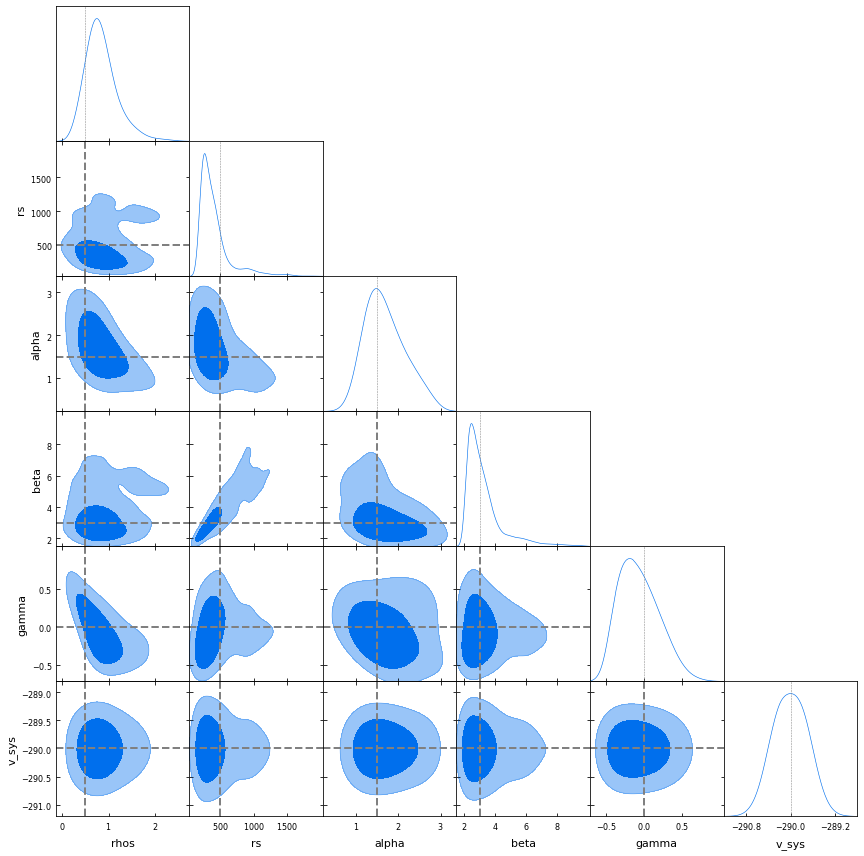

In [13]:
s1 = DataFull
s1 = s1[:,(4,5,6,7,8,9,14)]

samples1 = MCSamples(samples=s1, label='sample1',names=["rh","rhos","rs","alpha","beta","gamma","v_sys"])

g = plots.getSubplotPlotter()
g.triangle_plot(samples1,filled=True,markers=[0.5,500,1.5,3.0,0.0,-290],marker_args={"lw": "2"})
#g.export('triangle_plot.png')
g.export('triangle_plot.pdf')

In [14]:
def get_constraints(samples):
    for i, mean in enumerate(samples.getMeans()):
        upper = samples.confidence(i, upper=True, limfrac=0.05)
        print("\nupper limit 95 C.L. = %f" % upper)
        lower = samples.confidence(i, upper=False, limfrac=0.05)
        print("lower limit 95 C.L. = %f" % lower)
        print("%s = %f +/- %f +/- %f" % (samples.parLabel(i),\

        mean, mean - samples.confidence(i, limfrac=0.16),\
        mean - samples.confidence(i, limfrac=0.025)) )
    return 

get_constraints(samples1)


upper limit 95 C.L. = 1.534089
lower limit 95 C.L. = 0.330831
 = 0.844415 +/- 0.334038 +/- 0.578779

upper limit 95 C.L. = 952.919983
lower limit 95 C.L. = 186.498962
 = 407.543396 +/- 185.348175 +/- 235.157471

upper limit 95 C.L. = 2.635800
lower limit 95 C.L. = 0.995652
 = 1.688594 +/- 0.488054 +/- 0.800987

upper limit 95 C.L. = 5.870127
lower limit 95 C.L. = 2.079726
 = 3.223551 +/- 0.962282 +/- 1.185390

upper limit 95 C.L. = 0.417133
lower limit 95 C.L. = -0.456567
 = -0.073065 +/- 0.291053 +/- 0.406141

upper limit 95 C.L. = -289.481262
lower limit 95 C.L. = -290.534790
 = -290.008197 +/- 0.332257 +/- 0.618298


In [15]:
from GetErr import GetErr

['./out_cat1_MCMC_0.dat', './out_cat1_MCMC_1.dat', './out_cat1_MCMC_2.dat', './out_cat1_MCMC_3.dat', './out_cat1_MCMC_4.dat', './out_cat2_MCMC_0.dat', './out_cat2_MCMC_1.dat', './out_cat2_MCMC_2.dat', './out_cat2_MCMC_3.dat', './out_cat2_MCMC_4.dat', './out_cat3_MCMC_0.dat', './out_cat3_MCMC_1.dat', './out_cat4_MCMC_0.dat', './out_cat4_MCMC_1.dat', './out_cat4_MCMC_2.dat', './out_cat4_MCMC_3.dat', './out_cat4_MCMC_4.dat', './out_cat5_MCMC_0.dat', './out_cat5_MCMC_1.dat', './out_cat5_MCMC_2.dat', './out_cat5_MCMC_3.dat', './out_cat5_MCMC_4.dat', './out_nekoya_MCMC_0.dat', './out_nekoya_MCMC_1.dat', './out_nekoya_MCMC_2.dat', './out_nekoya_MCMC_3.dat', './out_nekoya_MCMC_4.dat']
(4497935, 15)
Removed no burn in
Total Error: 0.6706686840582836
Total Error: 252.7923574708018
Total Error: 0.821054051417279
Total Error: 1.2062938716523428
Total Error: 0.4130604100313648
Total Error: 0.618429113859765
[0.6706686840582836, 252.7923574708018, 0.821054051417279, 1.2062938716523428, 0.41306041003

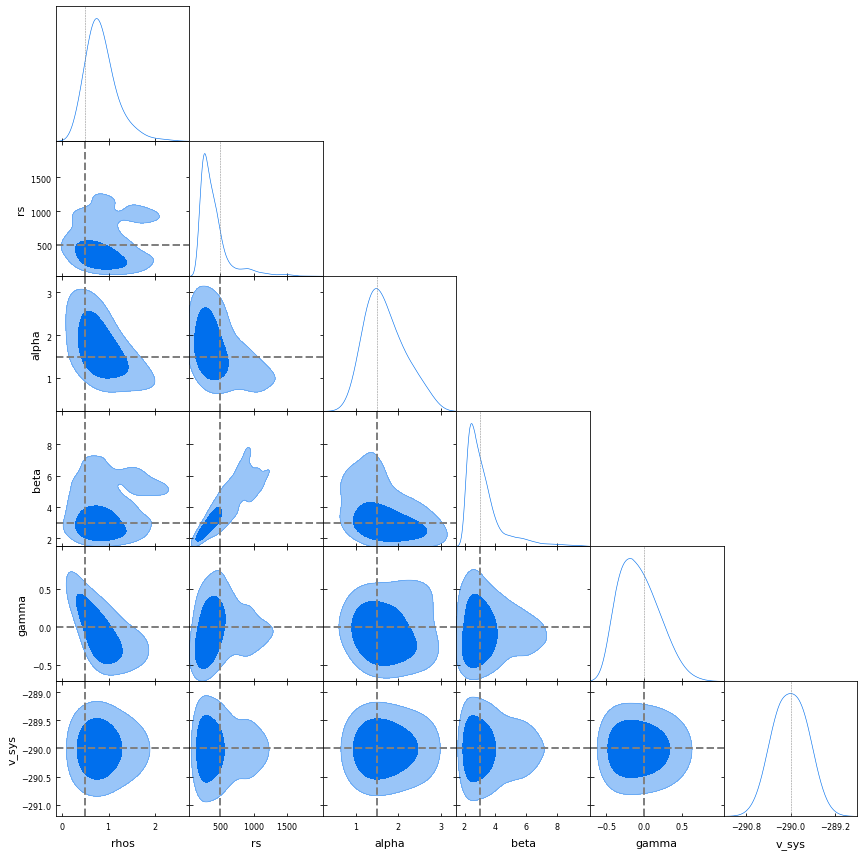

In [16]:
print(GetErr("."))